# JAX-Fluids: Cylinderflow demo

In this demo we show how to simulate a subsonic viscous cylinderflow at the Reynolds numbers 40 and 200. It is known that the phenomenon of periodic vortex shedding first appears for Reynolds numbers around 40-50 (Linnick, Mark N., and Hermann F. Fasel. "A high-order immersed interface method for simulating unsteady incompressible flows on irregular domains." Journal of Computational Physics 204.1 (2005)).

Frist we import all necessary packages

In [1]:
import json
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

from jaxfluids import InputReader, Initializer, SimulationManager
from jaxfluids.post_process import load_data

The present case setup file *cylinder.json* specifies a cylinder with a diamenter of 1.0, an inlet velocity of 0.1 and a dynamic viscosity of 0.0025. This results in a Reynolds number of 40.

In [2]:

# SETUP SIMULATION
case_setup = json.load(open("cylinderflow.json"))
input_reader = InputReader(case_setup, "numerical_setup.json")
initializer  = Initializer(input_reader)
sim_manager  = SimulationManager(input_reader)

# RUN SIMULATION
buffer_dictionary = initializer.initialization()
sim_manager.simulate(buffer_dictionary)


*------------------------------------------------------------------------------*
*                                                                              *
*                                                                              *
*          _     _    __  __        _____  _      _   _  ___  ____   ____      *
*         | |   / \   \ \/ /       |  ___|| |    | | | ||_ _||  _ \ / ___|     *
*      _  | |  / _ \   \  /  _____ | |_   | |    | | | | | | | | | |\___ \     *
*     | |_| | / ___ \  /  \ |_____||  _|  | |___ | |_| | | | | |_| | ___) |    *
*      \___/ /_/   \_\/_/\_\       |_|    |_____| \___/ |___||____/ |____/     *
*                                                                              *
*                                By BB - ML@AER                                *
*                                                                              *
*------------------------------------------------------------------------------*
* JAX-FLUIDS -              

Now we decrease the dynamic viscosity to 0.0005 increasing the Reynolds number to 200 and simulate.

In [9]:
# SETUP SIMULATION
case_setup = json.load(open("cylinderflow.json"))
case_setup["material_properties"]["dynamic_viscosity"] = 0.0005
input_reader = InputReader(case_setup, "numerical_setup.json")
initializer  = Initializer(input_reader)
sim_manager  = SimulationManager(input_reader)

# RUN SIMULATION
buffer_dictionary = initializer.initialization()
# sim_manager.simulate(buffer_dictionary)
print(sim_manager.boundary_condition.boundary_types_primes.items())

dict_items([('east', 'neumann'), ('west', 'dirichlet'), ('north', 'neumann'), ('south', 'neumann'), ('top', 'inactive'), ('bottom', 'inactive')])


## Visualize the flow field
We plot the vorticity contours at the final time snapshot of both Reynolds numbers.

Loading time snapshot 1.1002e+02
Loading time snapshot 1.0007e+01


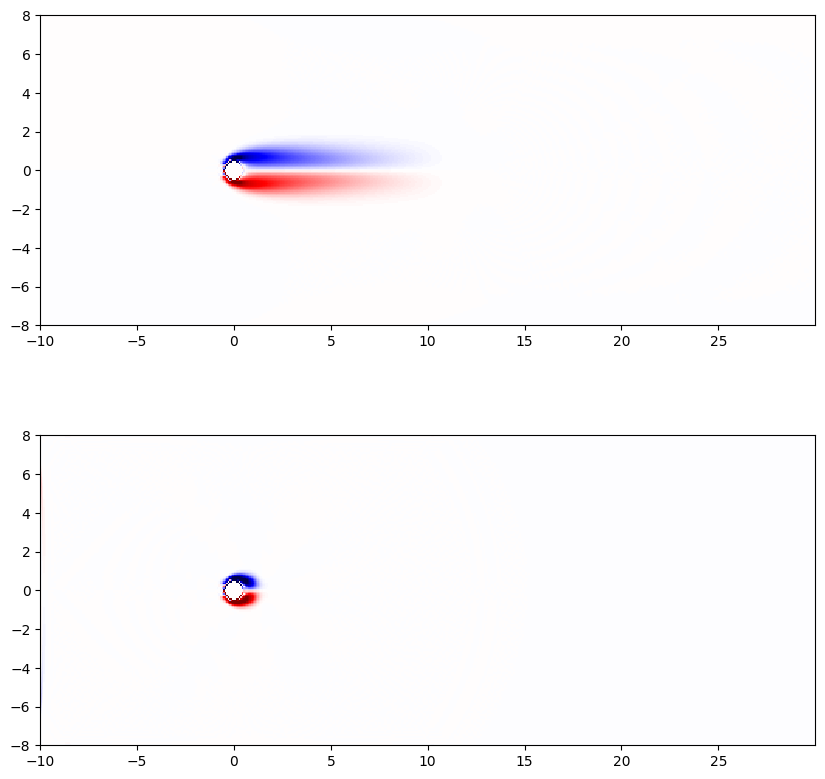

In [4]:
# LOAD AND PLOT DATA
quantities = ["vorticity", "mask_real"]

path = "./results/cylinderflow/domain"
cell_centers, cell_sizes, times, data_dict = load_data(path, quantities, start=-1)
mask = data_dict["mask_real"][-1,:,:,0]
vorticity_40 = data_dict["vorticity"][-1,-1,:,:,0] * mask

path = "./results/cylinderflow-1/domain"
cell_centers, cell_sizes, times, data_dict = load_data(path, quantities, start=-1)
vorticity_200 = data_dict["vorticity"][-1,-1,:,:,0] * mask

X,Y = np.meshgrid(cell_centers[0],cell_centers[1],indexing="ij")

norm = colors.CenteredNorm(vcenter=0.0, halfrange=0.3)

fig, ax = plt.subplots(2,1)
fig.set_size_inches([10,10])
ax[0].pcolormesh(X,Y,vorticity_40,cmap="seismic",norm=norm)
ax[1].pcolormesh(X,Y,vorticity_200,cmap="seismic",norm=norm)
ax[0].set_aspect("equal")
ax[1].set_aspect("equal")
plt.show()